In [1]:
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
zillow = wrangle.get_zillow()

this file exists, reading from csv


In [3]:
zillow = wrangle.prep_zillow(zillow)

In [4]:
train, validate, test = wrangle.split_zillow(zillow)

In [6]:
train_scaled,val_scaled,test_scaled = wrangle.scaling(train,validate,test)

<div class="alert alert-block alert-success">
    
# Min-Max Scaling
</div>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [12]:
X_train = train.drop(columns=['Tax Value','FIPS','Property Land Use'])
y_train = train['Tax Value']

X_val= validate.drop(columns=['Tax Value','FIPS','Property Land Use'])
y_val = validate['Tax Value']

X_test = test.drop(columns=['Tax Value','FIPS','Property Land Use'])
y_test = test['Tax Value']

In [17]:
X_train

,Bedroom Count,Bathroom Count,Finished Square Feet,Year Built,Tax Amount
462820,5.0,4.0,3011.0,2005.0,7561.14
3880,3.0,2.0,1682.0,1961.0,7086.19
992263,4.0,2.0,1433.0,1954.0,1134.83
311722,3.0,2.5,2001.0,1999.0,4174.92
787985,4.0,2.0,2277.0,1962.0,7113.02
...,...,...,...,...,...
1966409,3.0,2.0,1452.0,1963.0,4009.01
1248263,4.0,3.0,2674.0,1979.0,4248.88
28211,5.0,3.0,1903.0,1965.0,3924.33
279547,4.0,4.5,3672.0,2001.0,13029.86


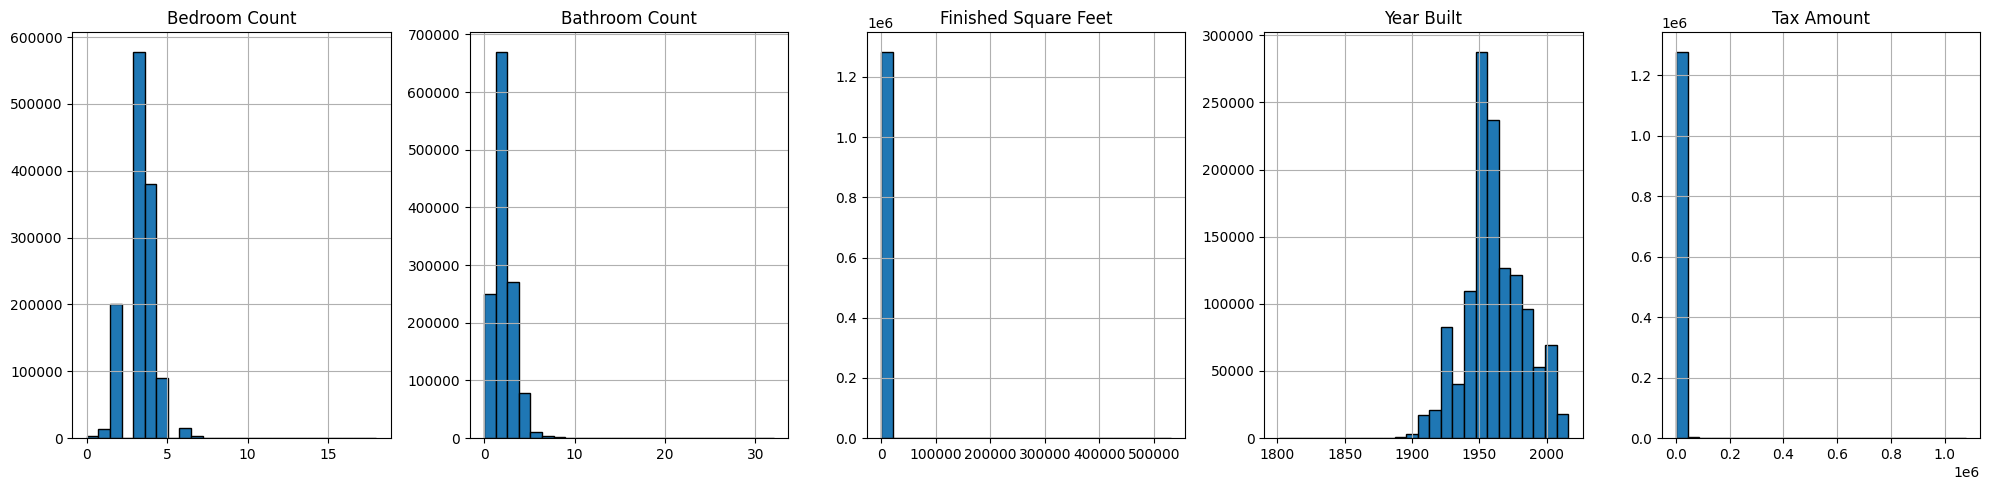

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
X_train.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

In [59]:
scaler = MinMaxScaler()
train_scaled = pd.DataFrame()
train_scaled[X_train.columns] = scaler.fit_transform(X_train)

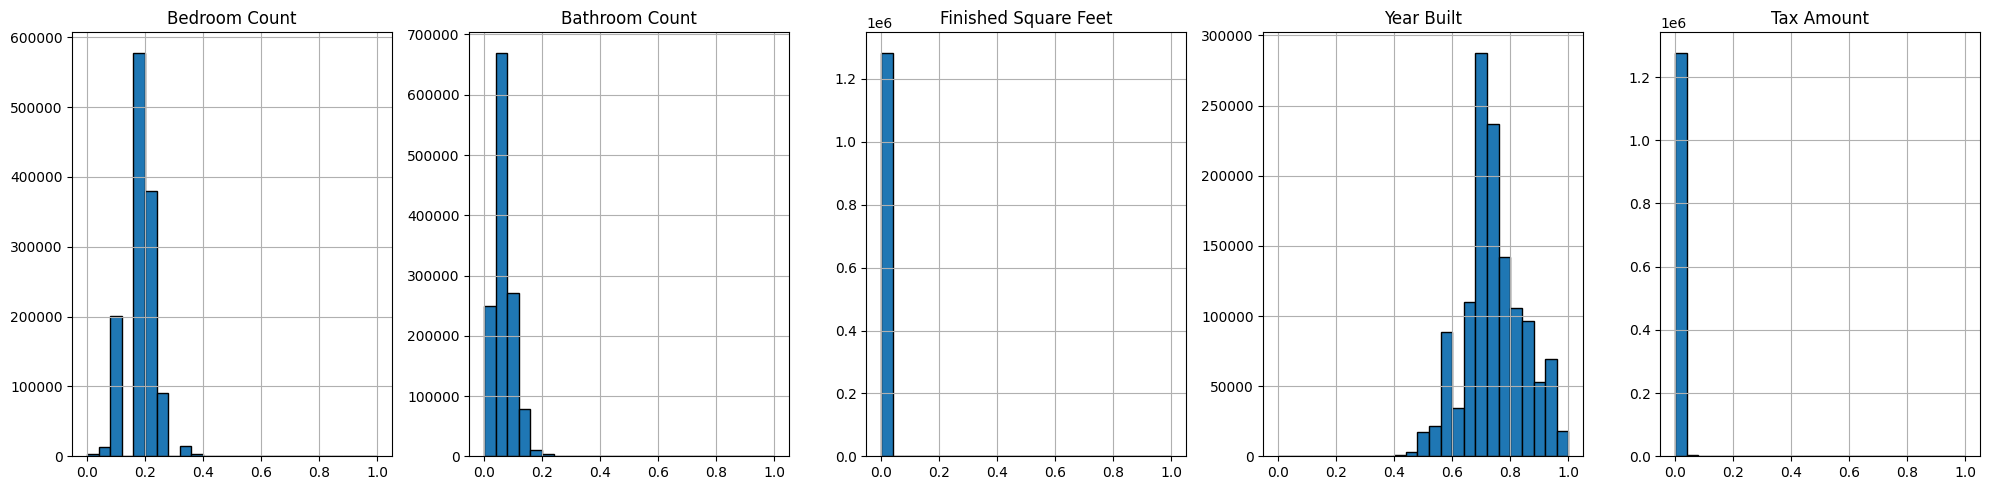

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_scaled.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# > Inverse Transform
</div>

In [88]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_reverse = scaler.inverse_transform(X_train_scaled)

In [89]:
(X_train_reverse == X_train).mean()

Bedroom Count           0.927599
Bathroom Count          1.000000
Finished Square Feet    0.988879
Year Built              0.593855
Tax Amount              0.973676
dtype: float64

<div class="alert alert-block alert-success">
    
# Quantile Transformer

</div>

In [18]:
scaler = QuantileTransformer(n_quantiles=1000, random_state=123)
train_quantile = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

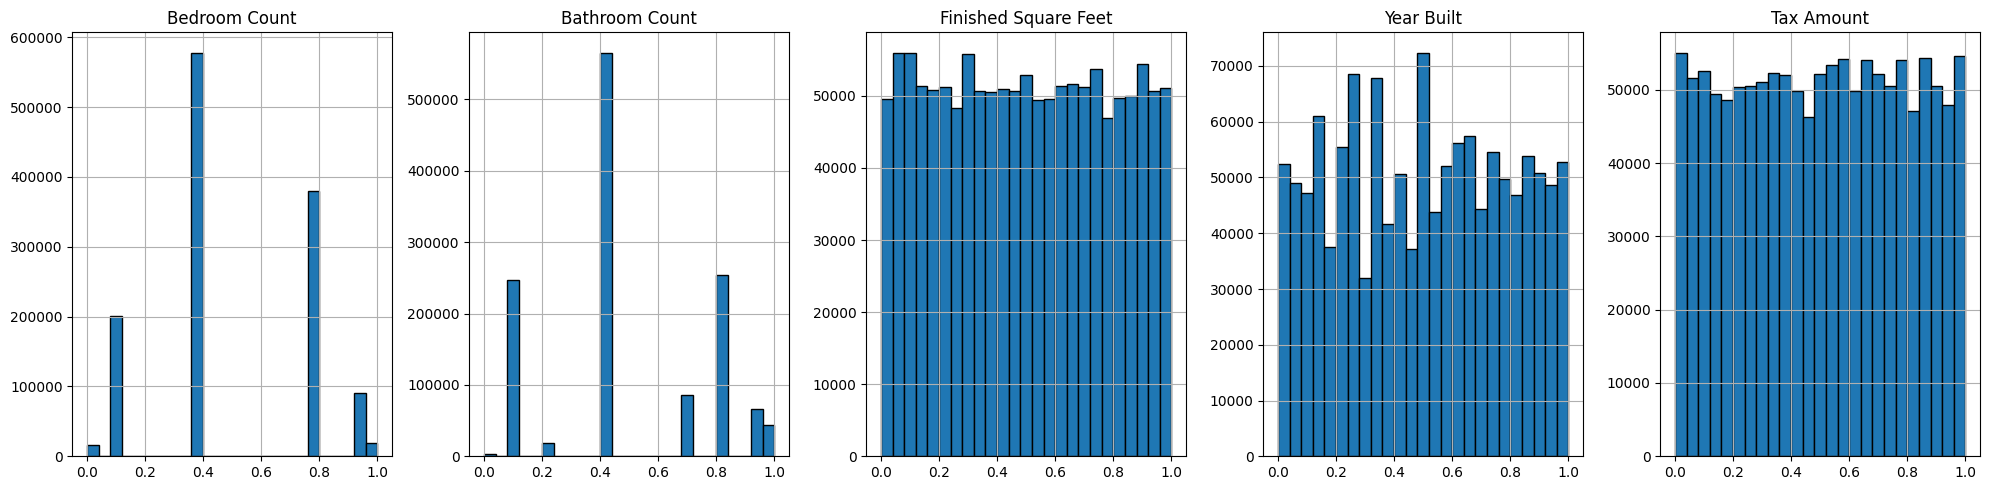

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_quantile.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

In [102]:
scaler = QuantileTransformer(n_quantiles=1000, random_state=123, output_distribution='normal', ignore_implicit_zeros=False, copy=True)
train_quantile = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

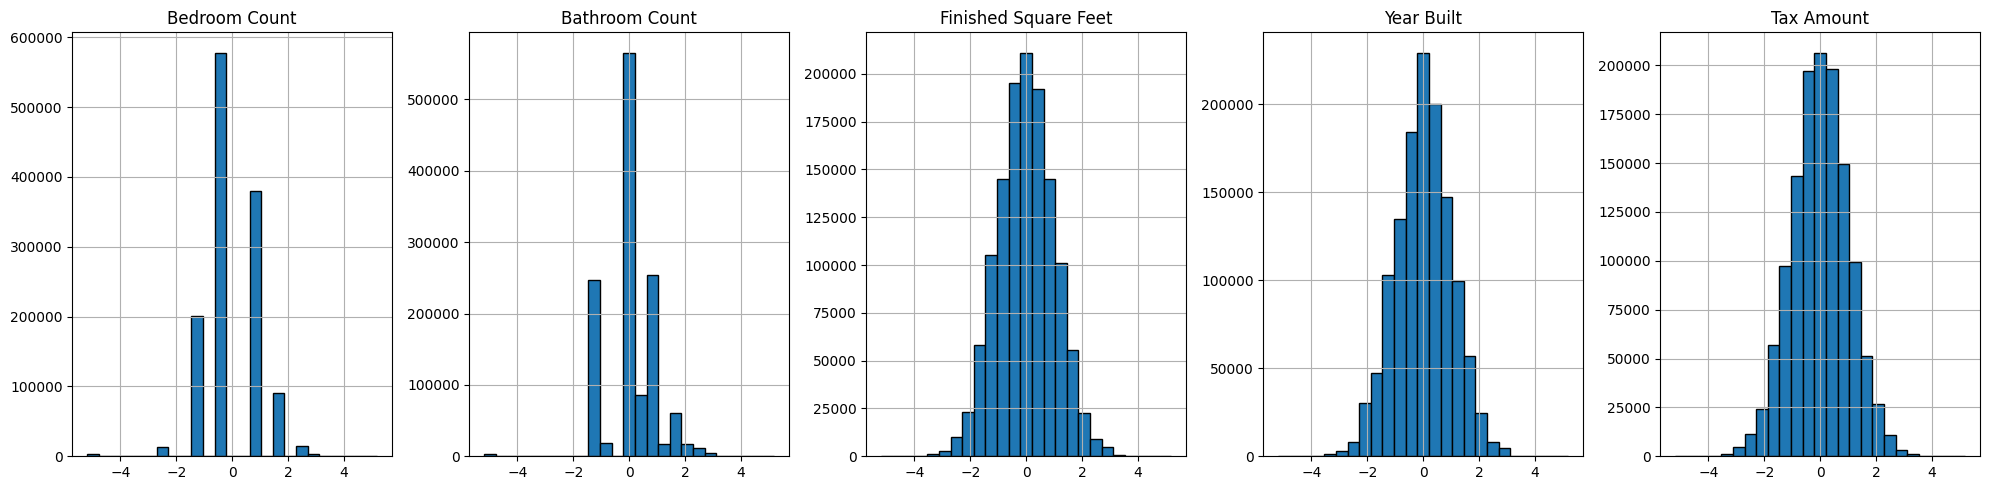

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_quantile.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# Standard Scaling
</div>

In [106]:
scaler = StandardScaler()
train_standard = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

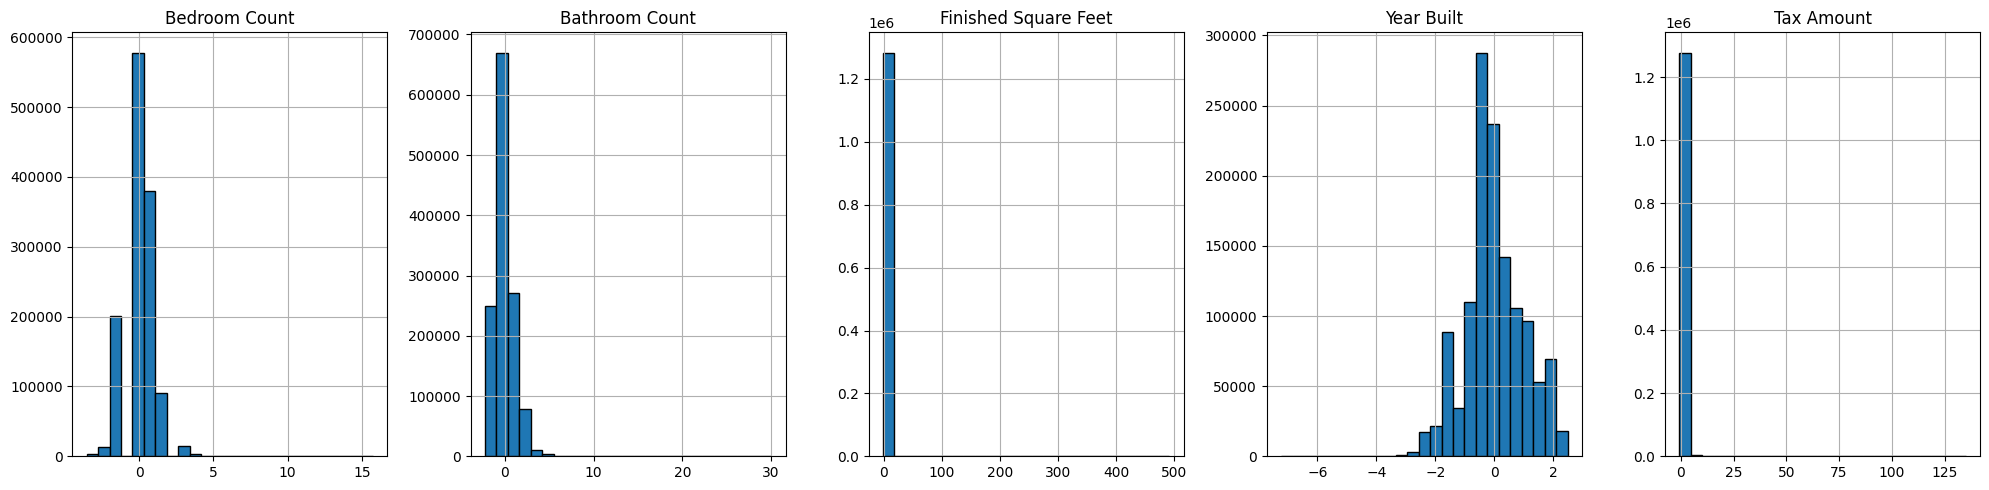

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_standard.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# Robust Scaling
</div>

In [111]:
scaler = RobustScaler()
train_robust = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

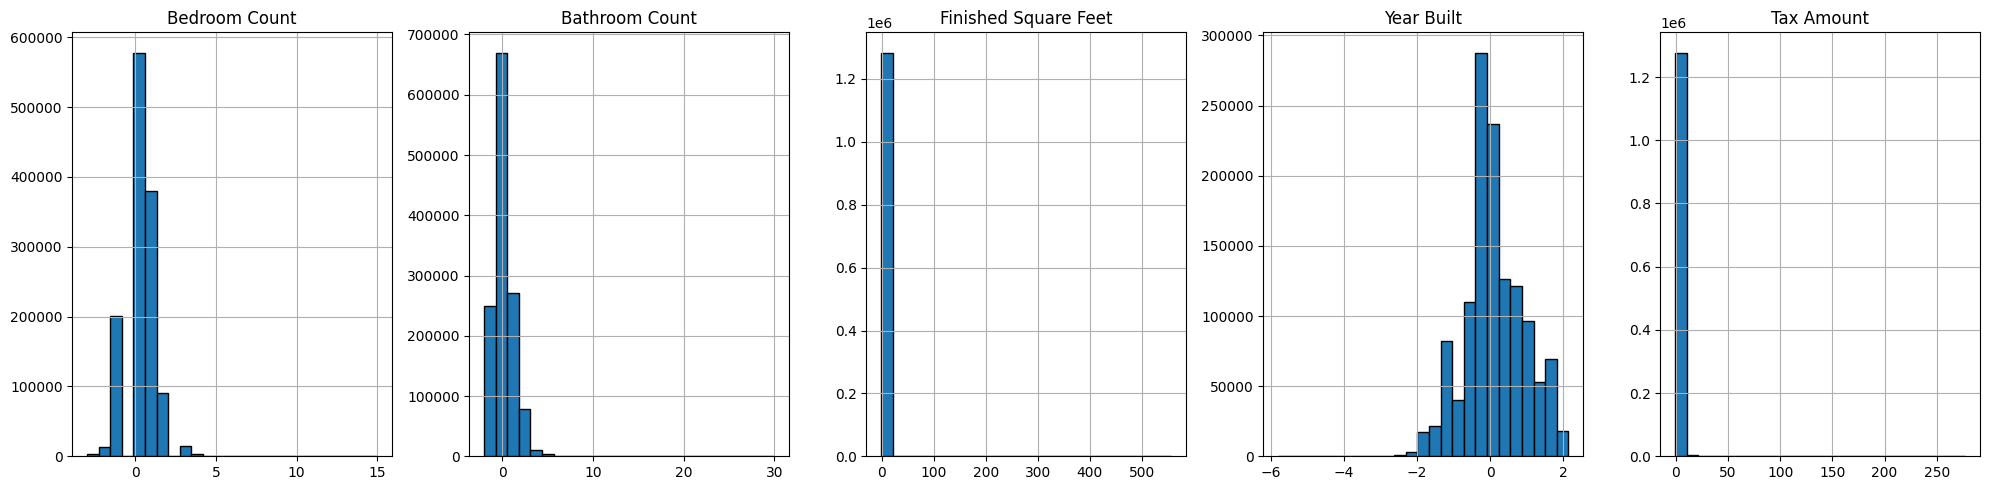

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_robust.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

In [113]:
def scaling(train,validate,test):
    X_train = train.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_train = train['Tax Value']
    
    X_val= validate.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_val = validate['Tax Value']
    
    X_test = test.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_test = test['Tax Value']

    scaler = QuantileTransformer(n_quantiles=1000, random_state=123)
    train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    val_scaled = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)
    test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

    return train_scaled,val_scaled,test_scaled